In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import pandas as pd

In [18]:
results_df = pd.read_csv("new_results_all.csv")

In [19]:
## Create number placed dataframe

ratio_list = ["25:75", "50:50", "75:25"]
capacity_list = [10,20,30,40,50,60,70,80,90,100]
method_list = ["choice", "segregated"]
type_list = ["family", "single person"]
run_id_list = [0,1,2,3,4,5,6,7,8,9]

new_cap_list = []
new_type_list = []
new_method_list = []
new_ratio_list = []
placed_list = []
size_list = []
run_list = []

for ratio in ratio_list:
    for capacity in capacity_list:
        for method in method_list:
            for curr_type in type_list:
                for run_id in run_id_list:
                    curr_df = results_df["time"][(results_df["capacity"]==capacity) & (results_df["method"]==method) & (results_df["type"]==curr_type) & (results_df["ratio"]==ratio) & (results_df["run_id"]==run_id)]
                    #print(curr_df)
                    non_nans = (~np.isnan(curr_df)).sum()
                    #print(len(curr_df))
                    new_cap_list = np.concatenate((new_cap_list, [capacity]))
                    new_type_list = np.concatenate((new_type_list, [curr_type]))
                    new_method_list = np.concatenate((new_method_list, [method]))
                    new_ratio_list = np.concatenate((new_ratio_list, [ratio]))
                    placed_list = np.concatenate((placed_list, [non_nans]))
                    size_list = np.concatenate((size_list, [len(curr_df)]))
                    run_list = np.concatenate((run_list, [run_id]))
                    
num_placed_df = pd.DataFrame({"capacity":new_cap_list, "ratio":new_ratio_list, "method":new_method_list, "type": new_type_list, "run_id": run_list,"quantity":size_list,"placed":placed_list})



In [20]:
new_cap_list = []
new_method_list = []
new_ratio_list = []
num_campers_list = []

for ratio in ratio_list:
    for capacity in capacity_list:
        for method in method_list:
            for curr_type in type_list:
                curr_df = num_placed_df["placed"][(num_placed_df["capacity"]==capacity) & (num_placed_df["type"]==curr_type) & (num_placed_df["method"]==method) & (num_placed_df["ratio"]==ratio)].reset_index(drop=True)
                if curr_type == "family":
                    family_coverage = np.mean(curr_df)*24
                else:
                    single_coverage = np.mean(curr_df)*2
            overall_coverage = (family_coverage + single_coverage)/2500
            num_campers_list.append(overall_coverage)
            new_cap_list.append(capacity)
            new_method_list.append(method)
            new_ratio_list.append(ratio)

coverage_df = pd.DataFrame({"capacity":new_cap_list,"method":new_method_list,"ratio":new_ratio_list,"coverage":num_campers_list})
print(coverage_df)

    capacity      method  ratio  coverage
0         10      choice  25:75   0.09680
1         10  segregated  25:75   0.09680
2         20      choice  25:75   0.19360
3         20  segregated  25:75   0.19360
4         30      choice  25:75   0.26064
5         30  segregated  25:75   0.27120
6         40      choice  25:75   0.29312
7         40  segregated  25:75   0.36096
8         50      choice  25:75   0.23728
9         50  segregated  25:75   0.43488
10        60      choice  25:75   0.21312
11        60  segregated  25:75   0.43488
12        70      choice  25:75   0.23984
13        70  segregated  25:75   0.43488
14        80      choice  25:75   0.25888
15        80  segregated  25:75   0.43680
16        90      choice  25:75   0.27312
17        90  segregated  25:75   0.43584
18       100      choice  25:75   0.29312
19       100  segregated  25:75   0.43680
20        10      choice  50:50   0.09360
21        10  segregated  50:50   0.09360
22        20      choice  50:50   

In [36]:
for index, row in num_placed_df.iterrows():
    print(row["capacity"],row["ratio"],row["method"], row["type"], row["run_id"],row["quantity"],row["placed"])

10.0 25:75 choice family 0.0 8.0 8.0
10.0 25:75 choice family 1.0 8.0 8.0
10.0 25:75 choice family 2.0 8.0 8.0
10.0 25:75 choice family 3.0 8.0 8.0
10.0 25:75 choice family 4.0 8.0 8.0
10.0 25:75 choice family 5.0 8.0 8.0
10.0 25:75 choice family 6.0 8.0 8.0
10.0 25:75 choice family 7.0 8.0 8.0
10.0 25:75 choice family 8.0 8.0 8.0
10.0 25:75 choice family 9.0 8.0 8.0
10.0 25:75 choice single person 0.0 25.0 25.0
10.0 25:75 choice single person 1.0 25.0 25.0
10.0 25:75 choice single person 2.0 25.0 25.0
10.0 25:75 choice single person 3.0 25.0 25.0
10.0 25:75 choice single person 4.0 25.0 25.0
10.0 25:75 choice single person 5.0 25.0 25.0
10.0 25:75 choice single person 6.0 25.0 25.0
10.0 25:75 choice single person 7.0 25.0 25.0
10.0 25:75 choice single person 8.0 25.0 25.0
10.0 25:75 choice single person 9.0 25.0 25.0
10.0 25:75 segregated family 0.0 8.0 8.0
10.0 25:75 segregated family 1.0 8.0 8.0
10.0 25:75 segregated family 2.0 8.0 8.0
10.0 25:75 segregated family 3.0 8.0 8.0
10.0 2

In [22]:
## Calculate pitch values
"""
for i in range(10):
    num_campers = num_campers_list[i]
    capacity = capacity_list[i]/100
    N_f = num_campers[0]
    N_s = num_campers[1]
    N = num_campers[0]+num_campers[1]

    #tau = ((50*50)*(1-capacity) - 24*N_f - 10*N_s)/(8*(N_f+N_s))
    #tau = ((50*50)*(1-capacity) / (24*N_f + 10*N_s + 8*(N_f+N_s)))
    print((-20*0.25)+8)
    print((20*0.25)**2)
    print(36*(1+0.25)*((-2500*(1-capacity))/N))
    print(16*(1+0.25))
    tau = ((8-20*0.25) + np.sqrt((20*0.25)**2 - 36*(1+0.25)*((-2500*(1-capacity))/N)))/(16*(1+0.25))
    print(capacity, tau)
    if tau < 1:
        # add buffer around the edge so it calculates as if tents will line up with the edge
        tau = (((50*50)+204)*(1-capacity) - 24*N_f - 10*N_s)/(8*(N_f+N_s))
        tau = (((50*50)+204)*(1-capacity) / (24*N_f + 10*N_s + 8*(N_f+N_s)))
        print(capacity, tau)"""

'\nfor i in range(10):\n    num_campers = num_campers_list[i]\n    capacity = capacity_list[i]/100\n    N_f = num_campers[0]\n    N_s = num_campers[1]\n    N = num_campers[0]+num_campers[1]\n\n    #tau = ((50*50)*(1-capacity) - 24*N_f - 10*N_s)/(8*(N_f+N_s))\n    #tau = ((50*50)*(1-capacity) / (24*N_f + 10*N_s + 8*(N_f+N_s)))\n    print((-20*0.25)+8)\n    print((20*0.25)**2)\n    print(36*(1+0.25)*((-2500*(1-capacity))/N))\n    print(16*(1+0.25))\n    tau = ((8-20*0.25) + np.sqrt((20*0.25)**2 - 36*(1+0.25)*((-2500*(1-capacity))/N)))/(16*(1+0.25))\n    print(capacity, tau)\n    if tau < 1:\n        # add buffer around the edge so it calculates as if tents will line up with the edge\n        tau = (((50*50)+204)*(1-capacity) - 24*N_f - 10*N_s)/(8*(N_f+N_s))\n        tau = (((50*50)+204)*(1-capacity) / (24*N_f + 10*N_s + 8*(N_f+N_s)))\n        print(capacity, tau)'

10.0
20.0
21.0
21.0
20.0
27.0
28.0
30.0
28.0
28.0
[10.0, 20.0, 21.0, 21.0, 20.0, 27.0, 28.0, 30.0, 28.0, 28.0]
[3.0, 6.0, 10.0, 13.0, 16.0, 20.0, 23.0, 27.0, 30.0, 33.0]


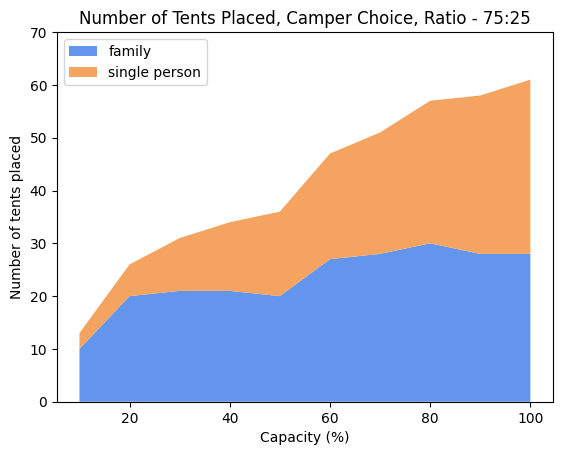

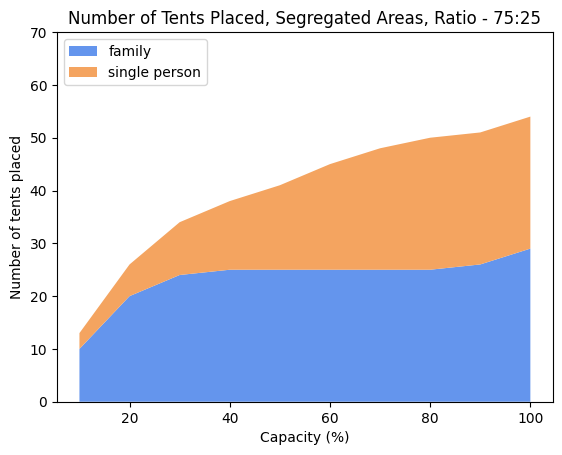

In [34]:
colours = ["cornflowerblue", "sandybrown"]
names = ["family","single person"]
family_df = num_placed_df[num_placed_df["type"]=="family"]
single_df = num_placed_df[num_placed_df["type"]=="single person"]

family_placed_choice = []
single_placed_choice = []

family_placed_segregated = []
single_placed_segregated = []

for capacity in capacity_list:
    #for method in method_list:
    curr_df = family_df["placed"][(family_df["capacity"]==capacity) & (family_df["method"]=="choice") & (family_df["ratio"]=="75:25")]
    family_placed_choice.append(np.mean(curr_df))
    print(np.mean(curr_df))
    curr_df = single_df["placed"][(single_df["capacity"]==capacity) & (single_df["method"]=="choice") & (single_df["ratio"]=="75:25")]
    single_placed_choice.append(np.mean(curr_df))

for capacity in capacity_list:
    #for method in method_list:
    curr_df = family_df["placed"][(family_df["capacity"]==capacity) & (family_df["method"]=="segregated") & (family_df["ratio"]=="75:25")]
    family_placed_segregated.append(np.mean(curr_df))
    curr_df = single_df["placed"][(single_df["capacity"]==capacity) & (single_df["method"]=="segregated") & (single_df["ratio"]=="75:25")]
    single_placed_segregated.append(np.mean(curr_df))

print(family_placed_choice)
print(single_placed_choice)       

plt.figure()
plt.stackplot(capacity_list,family_placed_choice, single_placed_choice,colors=colours,labels=names)
plt.legend(loc="upper left")
plt.ylim((0,70))
plt.title("Number of Tents Placed, Camper Choice, Ratio - 75:25")
plt.xlabel("Capacity (%)")
plt.ylabel("Number of tents placed")
plt.figure()
plt.stackplot(capacity_list,family_placed_segregated, single_placed_segregated,colors=colours,labels=names)
plt.legend(loc="upper left")
plt.ylim((0,70))
plt.title("Number of Tents Placed, Segregated Areas, Ratio - 75:25")
plt.xlabel("Capacity (%)")
plt.ylabel("Number of tents placed")
plt.show()

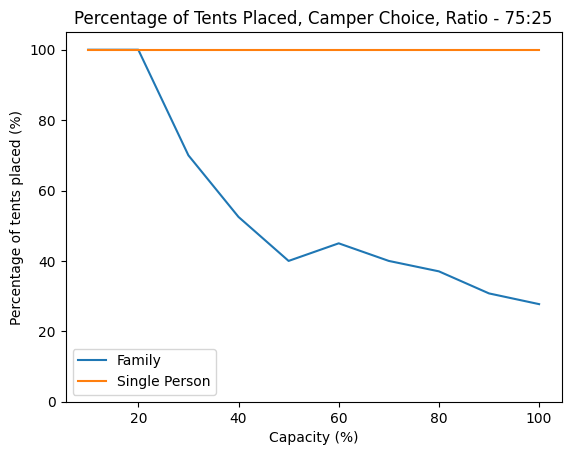

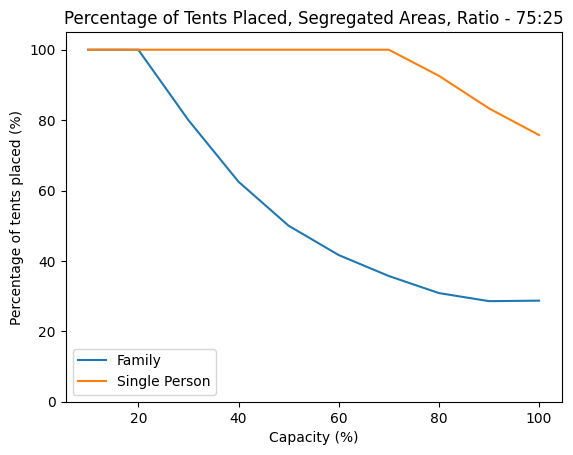

In [37]:
family_percent_choice = []
single_percent_choice = []
family_percent_segregated = []
single_percent_segregated = []

for capacity in capacity_list:
    curr_df = family_df["quantity"][(family_df["capacity"]==capacity) & (family_df["method"]=="choice") & (family_df["ratio"]=="75:25")]
    family_percent_choice.append(np.mean(curr_df))
    curr_df = single_df["quantity"][(single_df["capacity"]==capacity) & (single_df["method"]=="choice") & (single_df["ratio"]=="75:25")]
    single_percent_choice.append(np.mean(curr_df))

for capacity in capacity_list:
    curr_df = family_df["quantity"][(family_df["capacity"]==capacity) & (family_df["method"]=="segregated") & (family_df["ratio"]=="75:25")]
    family_percent_segregated.append(np.mean(curr_df))
    curr_df = single_df["quantity"][(single_df["capacity"]==capacity) & (single_df["method"]=="segregated") & (single_df["ratio"]=="75:25")]
    single_percent_segregated.append(np.mean(curr_df))

#print(family_percent_choice)
#print(family_placed_choice)

family_percent_choice = [(family_placed_choice[i]/family_percent_choice[i])*100 for i in range(len(family_placed_choice))]
single_percent_choice = [(single_placed_choice[i]/single_percent_choice[i])*100 for i in range(len(single_placed_choice))]
family_percent_segregated = [(family_placed_segregated[i]/family_percent_segregated[i])*100 for i in range(len(family_placed_segregated))]
single_percent_segregated = [(single_placed_segregated[i]/single_percent_segregated[i])*100 for i in range(len(single_placed_segregated))]


plt.figure()
sns.lineplot(x=capacity_list,y=family_percent_choice, legend='brief', label="Family")
sns.lineplot(x=capacity_list,y=single_percent_choice, legend='brief', label="Single Person")
plt.title("Percentage of Tents Placed, Camper Choice, Ratio - 75:25")
plt.xlabel("Capacity (%)")
plt.ylabel("Percentage of tents placed (%)")
plt.ylim((0,105))
plt.figure()
sns.lineplot(x=capacity_list,y=family_percent_segregated, legend='brief', label="Family")
sns.lineplot(x=capacity_list,y=single_percent_segregated, legend='brief', label="Single Person")
plt.title("Percentage of Tents Placed, Segregated Areas, Ratio - 75:25")
plt.xlabel("Capacity (%)")
plt.ylabel("Percentage of tents placed (%)")
plt.ylim((0,105))
plt.show()

Text(0, 0.5, '$H_{(T,i)}$')

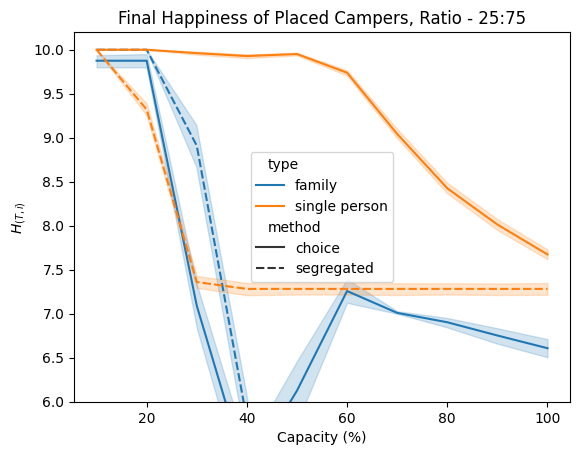

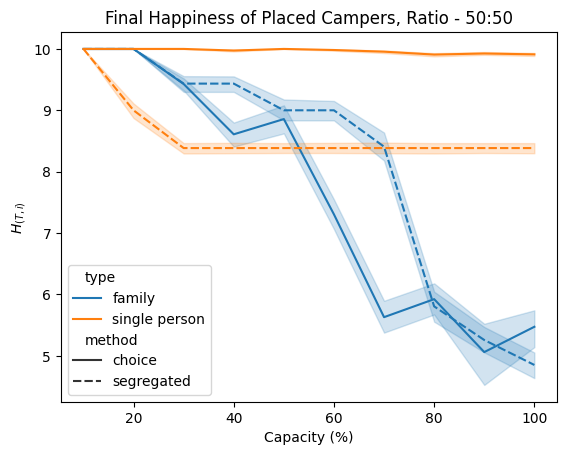

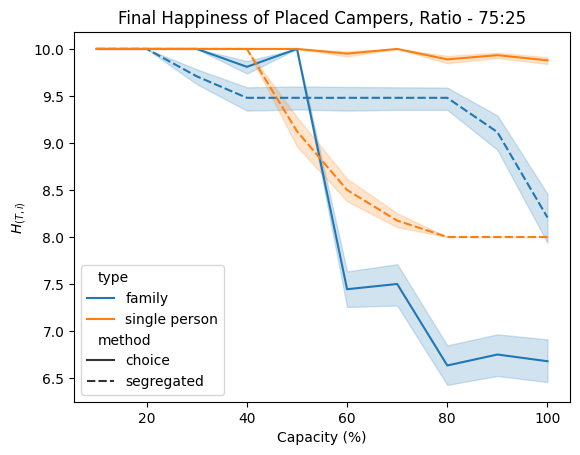

In [27]:
placed_results =  results_df.dropna()

ratio1 = placed_results[placed_results["ratio"]=="25:75"]
ratio2 = placed_results[placed_results["ratio"]=="50:50"]
ratio3 = placed_results[placed_results["ratio"]=="75:25"]

plt.figure()
sns.lineplot(data=ratio1, x="capacity", y="happiness", hue="type", style="method")
plt.title("Final Happiness of Placed Campers, Ratio - 25:75")
plt.xlabel("Capacity (%)")
plt.ylabel(r"$H_{(T,i)}$")
plt.ylim((6,10.2))
plt.figure()
sns.lineplot(data=ratio2, x="capacity", y="happiness", hue="type", style="method")
plt.title("Final Happiness of Placed Campers, Ratio - 50:50")
plt.xlabel("Capacity (%)")
plt.ylabel(r"$H_{(T,i)}$")
#plt.ylim((6,10.2))
plt.figure()
sns.lineplot(data=ratio3, x="capacity", y="happiness", hue="type", style="method")
plt.title("Final Happiness of Placed Campers, Ratio - 75:25")
plt.xlabel("Capacity (%)")
plt.ylabel(r"$H_{(T,i)}$")
#plt.ylim((6,10.2))

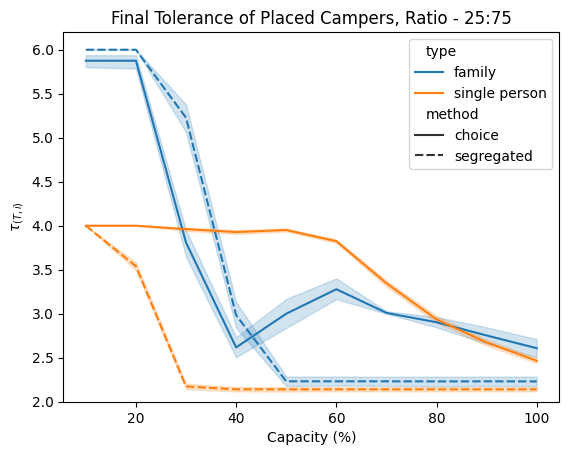

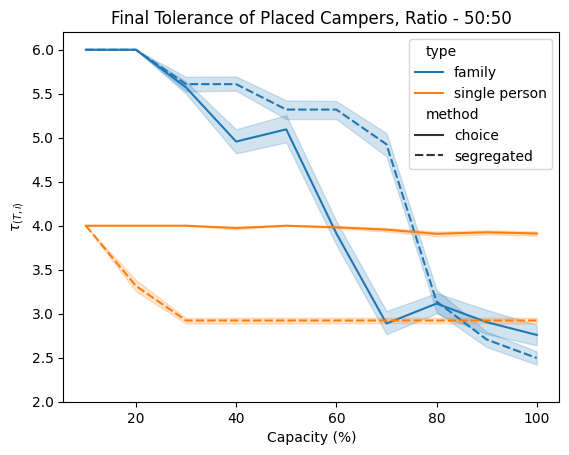

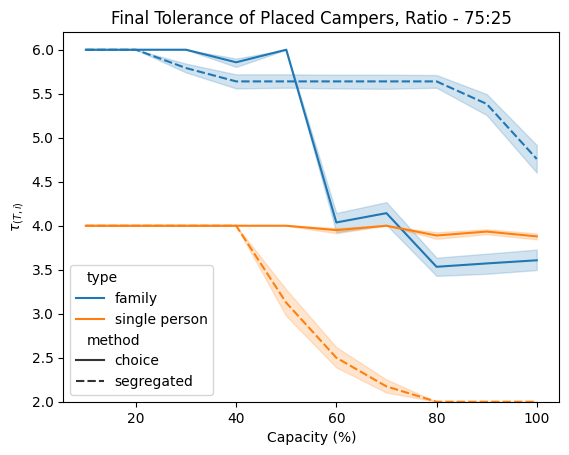

In [26]:
placed_results =  results_df.dropna()

ratio1 = placed_results[placed_results["ratio"]=="25:75"]
ratio2 = placed_results[placed_results["ratio"]=="50:50"]
ratio3 = placed_results[placed_results["ratio"]=="75:25"]
                        
plt.figure()
sns.lineplot(data=ratio1, x="capacity", y="tol", hue="type", style="method")
plt.title("Final Tolerance of Placed Campers, Ratio - 25:75")
plt.xlabel("Capacity (%)")
plt.ylabel(r"$\tau_{(T,i)}$")
plt.ylim((2,6.2))
plt.figure()
sns.lineplot(data=ratio2, x="capacity", y="tol", hue="type", style="method")
plt.title("Final Tolerance of Placed Campers, Ratio - 50:50")
plt.xlabel("Capacity (%)")
plt.ylabel(r"$\tau_{(T,i)}$")
plt.ylim((2,6.2))
plt.figure()
sns.lineplot(data=ratio3, x="capacity", y="tol", hue="type", style="method")
plt.title("Final Tolerance of Placed Campers, Ratio - 75:25")
plt.xlabel("Capacity (%)")
plt.ylabel(r"$\tau_{(T,i)}$")
plt.ylim((2,6.2))
#plt.figure()
#sns.lineplot(data=results_df, x="capacity", y="tol", hue="type", style="method")
#plt.figure()
#sns.lineplot(data=results_df, x="capacity", y="time", hue="type", style="method")
plt.show()